In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
import tqdm
from tqdm import trange
import scipy
from scipy.stats import bernoulli


In [2]:
import scipy
import scipy.stats as stats
from scipy.stats import bernoulli
import statistics

In [3]:
def is_consensus(x, fix):
    res = True
    count = 0
    for i in range(1, len(x)):
        if x[i-1] != x[i]:
            count += 1
    if count > 2:
        res = False
    return res
def clusters(x0,eps2, fix = {}):
    count = [x0[0]]
    l=0
    for i in range(1,len(x0)):
        if i not in fix:
            for j in range (len(count)):
                if np.abs(x0[i] - count[j])<eps2:
                    l+=1
            if l==0:
                count.append(x0[i])
            l=0
    return np.array(count)

In [4]:
def compare (x ,y, eps):
    result = 1
    for k in range(len(x)):
        if abs(x[k] - y[k]) >= eps:
            result = 0
    return bool(result)

def insert_agent(x, ind):
    if  ind != 0:
        opinion = (x[ind]+x[ind-1])/2
    else:
        opinion = x[ind]
    _X = np.insert(x,ind,opinion)
    return _X

def new_op(x, i, eps):
    count = 1
    summ = x[i]
    for k in range(len(x)):
        if (abs(x[i] - x[k]) < eps) and (i != k):
            #print(i, j, x[i], x[j])
            summ += x[k]
            count += 1
    #print(summ, count)
    return summ/count

def pair_count (x0, fix = {}):
    count = [0, 0]
    for i in range(len(x0)):
        if i not in fix:
            if x0[i] >= 0.5:
                count[0] += 1
            else:
                count[1] += 1
    #count[0] = count[0]/len(x0)
    #count[1] = count[1] / len(x0)
    return count

def Hen_Kr (x0, eps, eps2,fix, v):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        t += 1
        for j in range(len(x0)):
            if j not in fix:
                X[t][j] = new_op(X[t - 1], j, eps)
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

def find_fix(x0):
    diff = 1
    ind = 0
    for j in range (len(x0)):
        if (x0[j] - 0.5 < diff) and (x0[j] - 0.5 >= 0):
            ind = j
            diff = abs(0.5 - x0[j])
    return ind

In [5]:
def Hen_Kr_actm2_statistics (x0, eps, eps2,fix, v, prob):
    X = [np.array(x0)]
    t = 0
    consensus_value = 0
    consensus_time = 0
    consensus_flag = True
    pos0_6_time = 0
    pos0_6_flag = True
    while True:
        X.append(np.zeros(len(x0)))
        active_mask = bernoulli.rvs(p=prob, size=n)
        t += 1
        for j in range(len(x0)):
            if j not in fix and active_mask[j]==1:
                X_prev = np.copy(X[t -1])
                X_prev[active_mask==0]=0-2*eps - 2*eps2 
                X[t][j] = new_op(X_prev, j, eps)
                X[t][active_mask==0]=X[t-1][active_mask==0]
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if consensus_flag:
            ctrs = clusters(X[t],eps,fix_control)
            if len(ctrs) ==1:
                consensus_flag = False
                consensus_time = t
                consensus_value = X[t][0]
        if pos0_6_flag and np.all(X[t]>= 0.6):
            pos0_6_time = t
            pos0_6_flag = False
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t, consensus_value, consensus_time, pos0_6_time

In [86]:
eps = 0.2
eps2 = 0.001
n = 50
p = 0.5

In [87]:
cons_value_data = np.asarray([])
cons_time_data = np.asarray([])
positive_time_data = np.asarray([])
stop_time_data = np.asarray([])

cluster_numbers = np.zeros(n)


#cl_rs = np.zeros(n, dtype=object)
cl_rs = np.zeros(n, dtype=list)

count_experiments = 10000


prob=0.5

fix_control = set({})
v_c = 0

In [44]:
x0 = np.linspace(0, 1, num=n)
x0

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [88]:
count_experiments = 80000
prob=1.
for i in trange(count_experiments):
    
    x0 = np.random.sample(n)
    x0.sort()
    #x0 = np.linspace(0, 1, num=n)
        
    X, t, cons_value, cons_time, positive_time = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
    cltrs = clusters(X[t],eps,fix_control)
    
    cons_value_data = np.append(cons_value_data, cons_value)
    cons_time_data = np.append(cons_time_data, cons_time)
    positive_time_data = np.append(positive_time_data, positive_time)
    stop_time_data = np.append(stop_time_data, t)
    cluster_numbers[len(cltrs)-1] +=1
    
    cl_rs[len(cltrs)-1] = np.append(cl_rs[len(cltrs)-1], cltrs)
    if len(cltrs)==1 and cltrs[0]<eps:
        t_list = np.linspace(0, t, t + 1)
        fig = plt.figure(facecolor='white', figsize=(18, 9))

        ax1 = fig.add_subplot(121)
        ax1.plot(t_list, X, linewidth=2)

        ax1.set_xlabel('t')
        ax1.set_ylabel('opinion')

        ax1.title.set_text(f'p: {prob}, cl: {cltrs, len(cltrs)} n: {n}')
        plt.show()

  
'''print('Average consensus time:', np.mean(cons_time_data))
print('Average consensus value in consensus time:', np.mean(cons_value_data))
print('Average time when consensus reached 0.6:', np.mean(positive_time_data))
print('Average stop time:', np.mean(stop_time_data))
print('Average number of clusters:', np.mean(cluster_numbers))'''


print(cluster_numbers[:4])
#print(cl_rs)


100%|████████████████████████████████████████████████████████████████████████████| 80000/80000 [13:46<00:00, 96.82it/s]

[ 5436. 69832.  4732.     0.]


In [89]:
print(cluster_numbers[:4], np.sum(cluster_numbers))

[ 5436. 69832.  4732.     0.] 80000.0


среднекв отклонение 0.04680968777821046, дисперсия 0.0021911468698935454, мат ожидание 0.49947391820654174


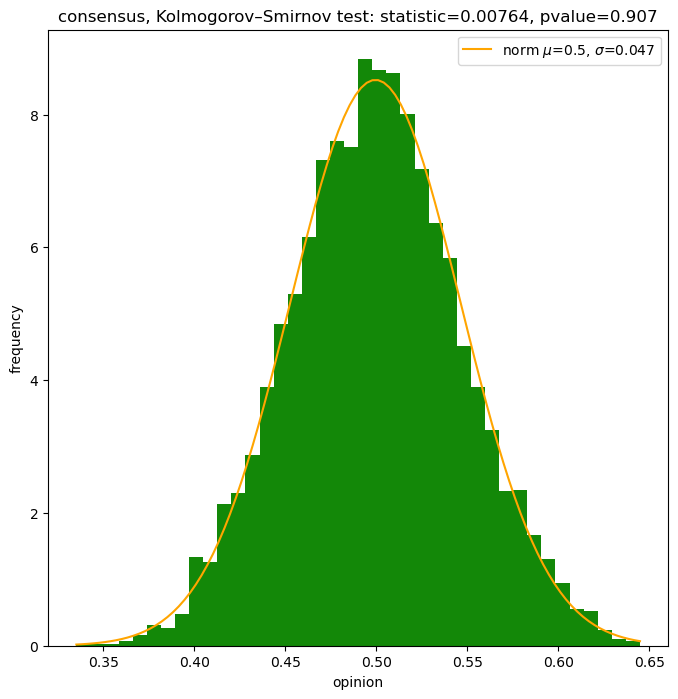

In [90]:
data = np.copy(cl_rs[0][1:])
mu = np.mean(data)
sigma = np.std(data) 
print(f'среднекв отклонение {sigma}, дисперсия {sigma**2}, мат ожидание {mu}')
cdf=lambda x: stats.norm.cdf(x,loc=mu,scale=sigma)
st, pv=stats.ks_1samp(np.array(data),cdf)

fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(data), density = True, bins=40, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
#x = np.linspace(0, 1, num=100)

#plt.title('consensus')
plt.title(f'consensus, Kolmogorov–Smirnov test: statistic={st:.3}, pvalue={pv:.3}')
plt.plot(x, stats.norm.pdf(x,mu,sigma), color ="orange", label=fr'norm $\mu$={mu:.1f}, $\sigma$={sigma:.3f}')
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.legend()

plt.show()

In [88]:
import statistics

statistics.variance(cl_rs[0][1:]), statistics.pvariance(cl_rs[0][1:])
np.std(cl_rs[0][1:]), np.mean(cl_rs[0][1:])

(0.045772361502470035, 0.5009803280690158)

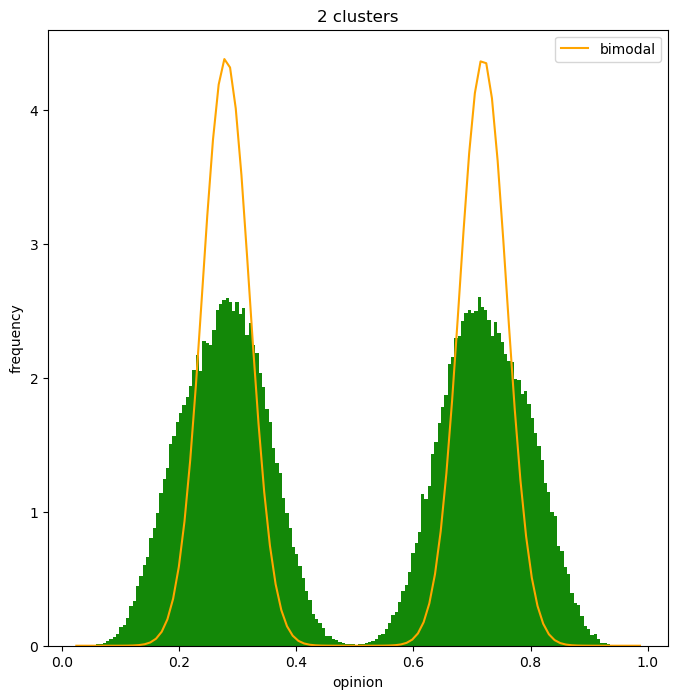

KstestResult(statistic=0.5521107801580938, pvalue=0.0)

In [91]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[1][1:]), density = True, bins=170, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

pdf = stats.norm.pdf
rvs = stats.norm.rvs
bimodal_pdf = pdf(x, loc=0.28, scale=0.04) * (float(0.44)) + \
              pdf(x, loc=0.719, scale=0.04) * (float(0.44))

bimodal_rvs = rvs(loc=0.288, scale=0.04, size=int((cl_rs[1][1:].shape[0])/2))* (float(0.45))
bimodal_rvs = np.append(bimodal_rvs, rvs(loc=0.719, scale=0.04, size=int((cl_rs[1][1:].shape[0])/2)))* (float(0.45))

plt.plot(x, bimodal_pdf, color ="orange", label='bimodal')
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.title('2 clusters')
plt.legend()

plt.show()


stats.ks_2samp(bimodal_rvs,np.array(cl_rs[1][1:]), mode='auto')

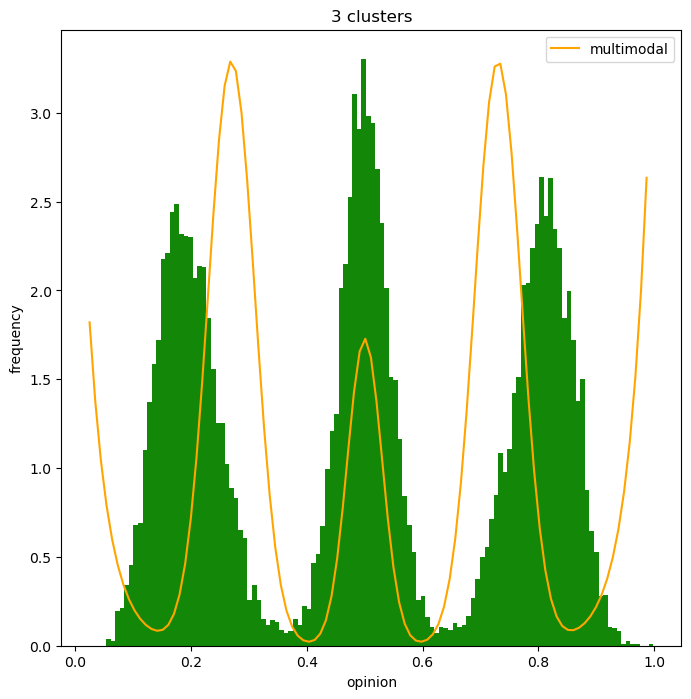

In [92]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[2][1:]), density = True, bins=120, stacked = True, color = '#138808')
pdf = stats.norm.pdf
rvs = stats.norm.rvs
trimodal_pdf = pdf(x, loc=0.27, scale=0.04) * (float(0.33)) + \
              pdf(x, loc=0.5, scale=0.03) * (float(0.13)) + \
              pdf(x, loc=0.73, scale=0.04) * (float(0.33))+ \
              stats.expon.pdf(x,0, 0.035) * (float(0.13))+ \
              stats.laplace.pdf(x,1.0, 0.035) * (float(0.27))


plt.plot(x, trimodal_pdf, color ="orange", label='multimodal')
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.title('3 clusters')
plt.legend()
plt.show()

In [93]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[3][1:]), density = True, bins=60, stacked = True, color = '#138808')
pdf = stats.norm.pdf
rvs = stats.norm.rvs
trimodal_pdf = pdf(x, loc=0.28, scale=0.04) * (float(0.3)) + \
              pdf(x, loc=0.5, scale=0.03) * (float(0.16)) + \
              pdf(x, loc=0.73, scale=0.04) * (float(0.33))+ \
              stats.expon.pdf(x,0, 0.035) * (float(0.14))+ \
              stats.laplace.pdf(x,1.0, 0.035) * (float(0.3))


plt.plot(x, trimodal_pdf, color ="orange", label='multimodal')
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.title('4 clusters')
plt.legend()
plt.show()

TypeError: 'int' object is not subscriptable

<Figure size 800x800 with 0 Axes>

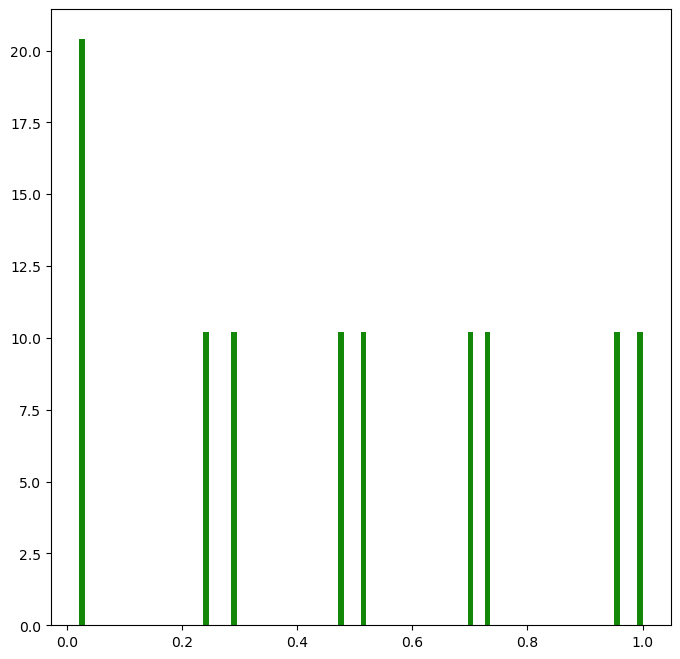

In [59]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[4][1:]), density = True, bins=100, stacked = True, color = '#138808')

In [94]:
np.save('hk_cluster_dn.npy', cluster_numbers)
np.save('hk_cluster_dv_0.npy', cl_rs[0])
np.save('hk_cluster_dv_1.npy', cl_rs[1])
np.save('hk_cluster_dv_2.npy', cl_rs[2])
np.save('hk_cluster_dv_3.npy', cl_rs[3])
np.save('hk_cluster_dv_4.npy', cl_rs[4])

In [81]:
cln = np.load('1cluster_dn.npy', mmap_mode = 'r')
clv0 = np.load('1cluster_dv_0.npy', mmap_mode = 'r')
clv1 = np.load('1cluster_dv_1.npy', mmap_mode = 'r')
clv2 = np.load('1cluster_dv_2.npy', mmap_mode = 'r')
clv3 = np.load('1cluster_dv_3.npy', mmap_mode = 'r')

clv0 = clv0[1:]
clv1 = clv1[1:]
clv2 = clv2[1:]
clv3 = clv3[1:]
print(cln[:4], np.sum(cln))

[  985. 68724.  9935.   354.] 80000.0


In [31]:
cln = np.load('hk_cluster_dn.npy', mmap_mode = 'r')
clv0 = np.load('hk_cluster_dv_0.npy', mmap_mode = 'r')
clv1 = np.load('hk_cluster_dv_1.npy', mmap_mode = 'r')
clv2 = np.load('hk_cluster_dv_2.npy', mmap_mode = 'r')
clv3 = np.load('hk_cluster_dv_3.npy', mmap_mode = 'r')

clv0 = clv0[1:]
clv1 = clv1[1:]
clv2 = clv2[1:]
#clv3 = clv3[1:]
print(cln[:4], np.sum(cln))

[ 5436. 69832.  4732.     0.] 80000.0


In [36]:
cln = np.load('noise_cluster_dn.npy', mmap_mode = 'r')
clv0 = np.load('noise_cluster_dv_0.npy', mmap_mode = 'r')
clv1 = np.load('noise_cluster_dv_1.npy', mmap_mode = 'r')
clv2 = np.load('noise_cluster_dv_2.npy', mmap_mode = 'r')
clv3 = np.load('noise_cluster_dv_3.npy', mmap_mode = 'r')

clv0 = clv0[1:]
clv1 = clv1[1:]
clv2 = clv2[1:]
clv3 = clv3[1:]

memmap([0.47825406, 0.48760479, 0.49939465, 0.49119332, 0.4870843 ,
        0.4933105 , 0.50952246, 0.48515531, 0.4989589 , 0.50129702,
        0.48601481, 0.50611973, 0.51150761, 0.50176136, 0.48792755,
        0.49249142, 0.50606241, 0.50883562, 0.50649086, 0.5143237 ,
        0.49677976, 0.50662522, 0.50605916, 0.49370232, 0.51228646,
        0.50898003, 0.509557  , 0.5013008 , 0.49913027, 0.49241468,
        0.51275371, 0.4916064 , 0.50980717, 0.50529724, 0.50069553,
        0.50987494, 0.50083717, 0.51790833, 0.49607574, 0.4926961 ,
        0.49593757, 0.49812153, 0.4952444 , 0.50259754, 0.5052617 ,
        0.49509616, 0.49560101, 0.50339831, 0.47801077, 0.49254544,
        0.4970284 , 0.49638159, 0.49042467, 0.52366439, 0.50350276,
        0.49845699, 0.50448412, 0.48820736, 0.5129349 , 0.49152075,
        0.49122373, 0.51437375, 0.503237  , 0.48679575, 0.51371698,
        0.4929235 , 0.50696815, 0.49449232, 0.50723897, 0.49661572,
        0.48491439, 0.48395224, 0.5019329 , 0.49

In [19]:
cln[3]+=1
print('StHK ',cln[:4], np.sum(cln[:4]), (cln/80000)[:4])

StHK  [ 2553. 59925. 17093.   428.] 79999.0 [0.0319125 0.7490625 0.2136625 0.00535  ]


In [22]:
print('HK ',cln[:4], np.sum(cln[:4]), (cln/80000)[:4])

HK  [ 5436. 69832.  4732.     0.] 80000.0 [0.06795 0.8729  0.05915 0.     ]


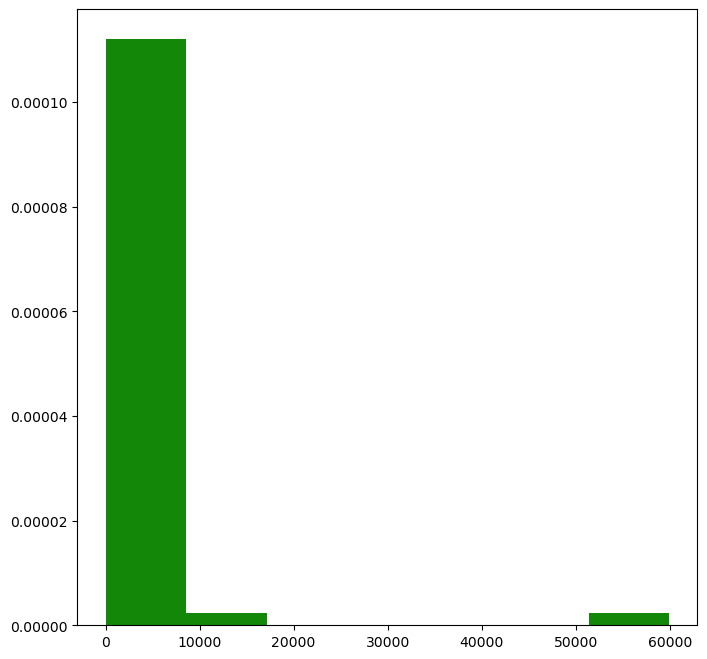

In [20]:
data = np.copy(cln)
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(data), density = True, bins='auto', stacked = True, color = '#138808')

In [8]:
mu = np.mean(clv0)
sigma = np.std(clv0) 
print(f'среднекв отклонение {sigma}, дисперсия {sigma**2}, мат ожидание {mu}')

среднекв отклонение 0.045772361502470035, дисперсия 0.002095109077512801, мат ожидание 0.5009803280690158


среднекв отклонение 0.045772361502470035, дисперсия 0.002095109077512801, мат ожидание 0.5009803280690158
1.0000000000000002


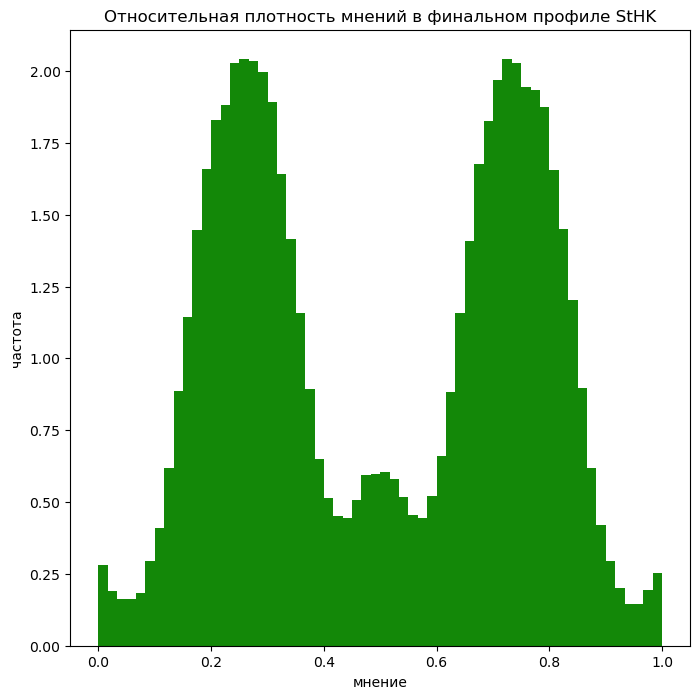

In [15]:
data = np.copy(clv0)
data = np.append(data, clv1)
data = np.append(data, clv2)
data = np.append(data, clv3)
print(f'среднекв отклонение {sigma}, дисперсия {sigma**2}, мат ожидание {mu}')



fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(data), density = True, bins='auto', stacked = True, color = '#138808')
plt.title(f'Относительная плотность мнений в финальном профиле StHK')
plt.xlabel('мнение')
plt.ylabel('частота')
values, bins, _ = hist
area = sum(np.diff(bins)*values)

print(area)
#plt.legend()

plt.show()

среднекв отклонение 0.04680968777821046, дисперсия 0.0021911468698935454, мат ожидание 0.49947391820654174
0.9999999999999997


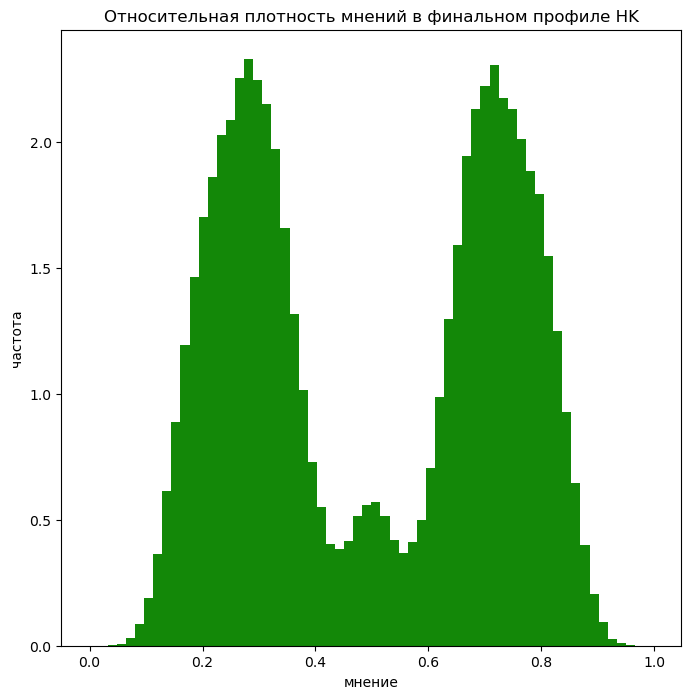

In [35]:
data = np.copy(clv0)
data = np.append(data, clv1)
data = np.append(data, clv2)
data = np.append(data, clv3)
print(f'среднекв отклонение {sigma}, дисперсия {sigma**2}, мат ожидание {mu}')


fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(data), density = True, bins='auto', stacked = True, color = '#138808')
plt.title(f'Относительная плотность мнений в финальном профиле HK')
plt.xlabel('мнение')
plt.ylabel('частота')
# plt.legend()
values, bins, _ = hist
area = sum(np.diff(bins)*values)

print(area)
plt.show()

среднекв отклонение 0.045772361502470035, дисперсия 0.002095109077512801, мат ожидание 0.5009803280690158


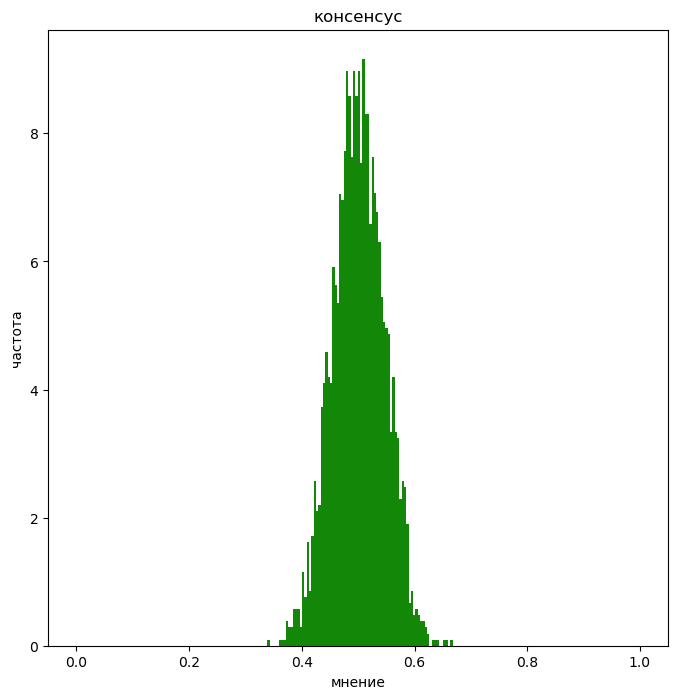

In [41]:
data = np.copy(clv0)
mu = np.mean(data)
sigma = np.std(data) 
print(f'среднекв отклонение {sigma}, дисперсия {sigma**2}, мат ожидание {mu}')


fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(data), density = True, bins=80, stacked = True, color = '#138808')
#x = np.linspace(hist[1].min(), hist[1].max(), num=100)
x = np.linspace(0, 1, num=100)
cdf=lambda x: stats.norm.cdf(x,loc=0.500,scale=0.046)
#cdf=lambda x: stats.norm.cdf(x,loc=mu,scale=sigma)
st, pv=stats.ks_1samp(np.array(data),cdf)
plt.title('консенсус')
#plt.title(f'consensus, Kolmogorov–Smirnov test: statistic={st:.3}, pvalue={pv:.3}')
#plt.title(f'консенсус, Тест Колмогорова-Смирнова: статистика={st:.3}, pvalue={pv:.3}')
#plt.plot(x, stats.norm.pdf(x,mu,sigma), color ="orange", label=fr'norm $\mu$={mu:.1f}, $\sigma$={sigma:.3f}')
plt.plot(x, stats.norm.pdf(x,mu,sigma), color ="#0000", label=fr'нормальное распределение'+'\n'+fr'$\mu$={mu:.1f}, $\sigma$={sigma:.3f}')

# plt.xlabel('opinion')
# plt.ylabel('frequency')
plt.xlabel('мнение')
plt.ylabel('частота')
#plt.legend()

plt.show()


In [42]:
np.std(clv0),np.std(clv0)**2, np.mean(clv0)

(0.010023821351381246, 0.00010047699448440655, 0.4999075638152794)

In [34]:
clv1=np.array(sorted(clv1))
clv1[int(clv1.shape[0]/2)-1]

0.4993770282568085

In [25]:
def bimodal_cdf(x, weight1, mean1, stdv1, mean2, stdv2):
    """
    CDF of a mixture of two normal distributions.
    """
    return (weight1*stats.norm.cdf(x, mean1, stdv1) +
            (1 - weight1)*stats.norm.cdf(x, mean2, stdv2))


data = clv1.copy()
data=np.array(sorted(data))
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(data), density = True, bins=300, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=500)

one=data[:int(data.shape[0]/2)]
two=data[int(data.shape[0]/2):]


mu1 = np.mean(one)
sigma1 = np.std(one) 
mu2 = np.mean(two)
sigma2 = np.std(two)
weight1=0.5
weight2=1.-weight1
# sigma1=0.043
# sigma2=0.043
print(f'среднекв отклонение {sigma1, sigma2}, дисперсия {sigma1**2, sigma2**2}, мат ожидание {mu1, mu2}, веса {weight1, weight2}')

pdf = stats.norm.pdf
rvs = stats.norm.rvs
bimodal_pdf = pdf(x, loc=mu1, scale=sigma1) * (float(weight1)) + \
              pdf(x, loc=mu2, scale=sigma2) * (float(weight2))


bimodal_rvs = rvs(loc=mu1, scale=sigma1, size=int((data.shape[0])/2))
bimodal_rvs = np.append(bimodal_rvs, rvs(loc=mu2, scale=sigma2, size=int((data.shape[0])/2)))

# plt.plot(x, bimodal_pdf, color ="orange", label='bimodal'+'\n'+fr'$\mu_1={mu1:.1f}$ $\sigma_1={sigma1:.3f}$'+'\n'+fr'$\mu_2={mu2:.1f}$ $\sigma_2={sigma2:.3f}$')
plt.plot(x, bimodal_pdf, color ="orange", label='бимодальное распределение'+'\n'+fr'$\mu_1={mu1:.1f}$ $\sigma_1={sigma1:.3f}$'+'\n'+fr'$\mu_2={mu2:.1f}$ $\sigma_2={sigma2:.3f}$')

# plt.xlabel('opinion')
# plt.ylabel('frequency')
# plt.title('2 clusters')

plt.xlabel('мнение')
plt.ylabel('частота')
plt.title('2 кластера')
plt.legend()

plt.show()

sample2 = np.concatenate((stats.norm.rvs(mu1, sigma1, size=len(one)),
                         (stats.norm.rvs(mu2, sigma2, size=len(two)))))

max_p=0
it=5
max_mu1=0
max_mu2=0
max_s1=0
max_s2=0
w1=0
w2=0
for sigma11 in np.linspace(sigma1-0.005, sigma1+0.005, it):
    for sigma22 in np.linspace(sigma2-0.005, sigma2+0.005, it):
        st, pv=stats.kstest(np.array(data),bimodal_cdf, args=(w, mu11, sigma11, mu22, sigma22))
        if pv>=max_p:
            max_mu1=mu11
            max_mu2=mu22
            max_s1=sigma11
            max_s2=sigma22
            w1=w
            w2=1.-w
            max_p=max(max_p, pv)
print(max_p)

IndentationError: unexpected indent (2858293050.py, line 66)

NameError: name 'max_mu1' is not defined

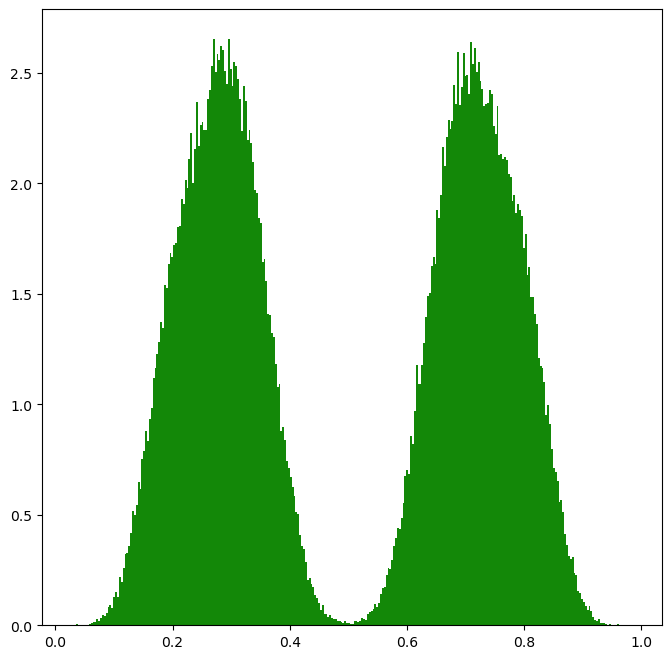

In [26]:
def bimodal_cdf(x, weight1, mean1, stdv1, mean2, stdv2):
    """
    CDF of a mixture of two normal distributions.
    """
    return (weight1*stats.norm.cdf(x, mean1, stdv1) +
            (1 - weight1)*stats.norm.cdf(x, mean2, stdv2))


data = clv1.copy()
data=np.array(sorted(data))
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(data), density = True, bins=300, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=500)

one=data[:int(data.shape[0]/2)]
two=data[int(data.shape[0]/2):]


mu1 = max_mu1
mu2=max_mu2
sigma1 =max_s1
sigma2=max_s2
weight1=w1
# sigma1=0.043
# sigma2=0.043
print(f'среднекв отклонение {sigma1, sigma2}, дисперсия {sigma1**2, sigma2**2}, мат ожидание {mu1, mu2}, веса {weight1, weight2}')

pdf = stats.norm.pdf
rvs = stats.norm.rvs
bimodal_pdf = pdf(x, loc=mu1, scale=sigma1) * (float(weight1)) + \
              pdf(x, loc=mu2, scale=sigma2) * (float(weight2))


bimodal_rvs = rvs(loc=mu1, scale=sigma1, size=int((data.shape[0])/2))
bimodal_rvs = np.append(bimodal_rvs, rvs(loc=mu2, scale=sigma2, size=int((data.shape[0])/2)))

# plt.plot(x, bimodal_pdf, color ="orange", label='bimodal'+'\n'+fr'$\mu_1={mu1:.1f}$ $\sigma_1={sigma1:.3f}$'+'\n'+fr'$\mu_2={mu2:.1f}$ $\sigma_2={sigma2:.3f}$')
plt.plot(x, bimodal_pdf, color ="orange", label='бимодальное распределение'+'\n'+fr'$\mu_1={mu1:.1f}$ $\sigma_1={sigma1:.3f}$'+'\n'+fr'$\mu_2={mu2:.1f}$ $\sigma_2={sigma2:.3f}$')

# plt.xlabel('opinion')
# plt.ylabel('frequency')
# plt.title('2 clusters')

plt.xlabel('мнение')
plt.ylabel('частота')
plt.title('2 кластера')
plt.legend()

plt.show()

In [57]:
c2 = sorted(clv1)
c2_1 = c2[:int(len(c2)/2)-1]
c2_2 = c2[int(len(c2)/2)+1:]
np.std(c2_2), np.mean(c2_2)

(0.042494697991292234, 0.7178076146117075)

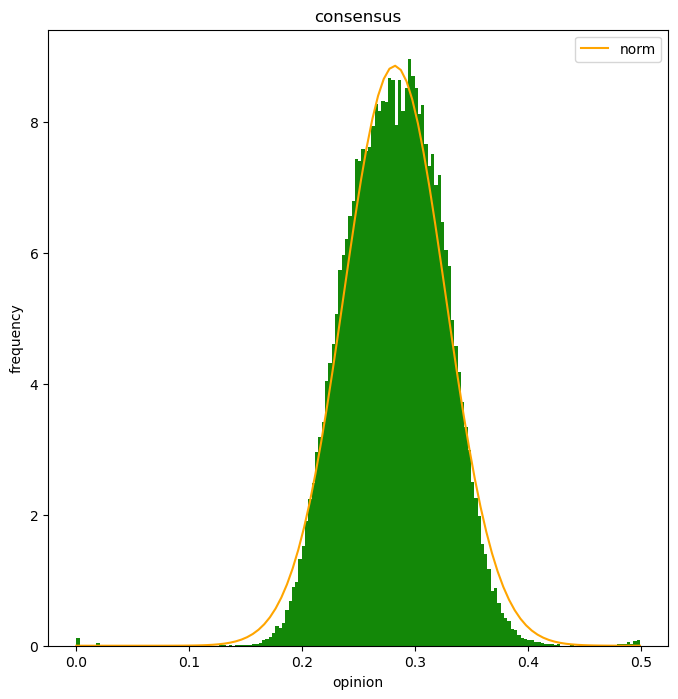

KstestResult(statistic=0.019473814337032325, pvalue=9.330963007169118e-12)

In [73]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(c2_1), density = True, bins=170, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

plt.plot(x, stats.norm.pdf(x,loc=0.282, scale=0.045), color ="orange", label='norm')
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.title('consensus')
plt.legend()

plt.show()
stats.ks_2samp(stats.norm.rvs(0.282,0.045, size=len(np.array(c2_1))),np.array(c2_1), mode='auto')

In [238]:
data = clv2.copy()
data=np.array(sorted(data))
data[int(data.shape[0]*(0.5/20))], data[int(data.shape[0]*(3.7/10))], data[int(data.shape[0]*(6.3/10))], data[int(data.shape[0]*(19.5/20))]

(0.03900211684815541,
 0.35816933344802676,
 0.6406614954993353,
 0.9567197165555796)

среднекв отклонение (0.08086656707396517, 0.027596115766269563, 0.08059007584340294), дисперсия (0.0065394016703281075, 0.0007615456053853515, 0.006494760324445438), мат ожидание (0.22293419460099798, 0.5004925463625199, 0.7777009322827015)


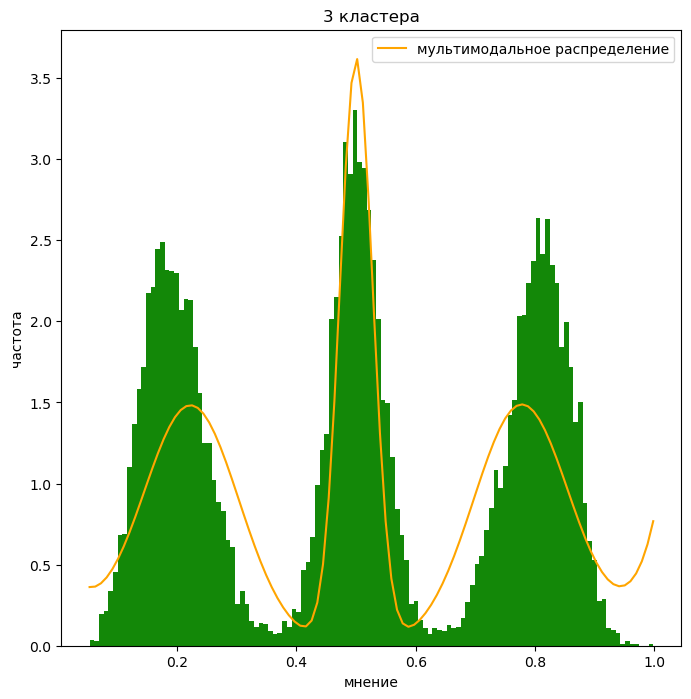

In [29]:
data = clv2.copy()
data=np.array(sorted(data))

fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(clv2), density = True, bins=120, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

one=data[:int(data.shape[0]*(0.5/20))]
two=data[int(data.shape[0]*(1/20)):int(data.shape[0]*(3.7/10))]
three=data[int(data.shape[0]*(3.7/10)):int(data.shape[0]*(6.3/10))]
four=data[int(data.shape[0]*(6.3/10)):int(data.shape[0]*(19/20))]
five=data[int(data.shape[0]*(19.5/20)):]

mu1 = np.mean(two)-0.01
sigma1 = np.std(two) 
mu2 = np.mean(three)
sigma2 = np.std(three) 
mu3 = np.mean(four)+0.01
sigma3 = np.std(four) 
print(f'среднекв отклонение {sigma1, sigma2, sigma3}, дисперсия {sigma1**2, sigma2**2, sigma3**2}, мат ожидание {mu1, mu2,mu3}')

pdf = stats.norm.pdf
rvs = stats.norm.rvs
trimodal_pdf = pdf(x, loc=mu1, scale=sigma1) * (float(0.3)) + \
              pdf(x, loc=mu2, scale=sigma2) * (float(0.25)) + \
              pdf(x, loc=mu3, scale=sigma3) * (float(0.3))+ \
              stats.expon.pdf(x,0, 0.04) * (float(0.03))+ \
            stats.laplace.pdf(x,0.999, 0.04) * (float(0.06))


plt.plot(x, trimodal_pdf, color ="orange", label='мультимодальное распределение')#+'\n'+fr'$\mu_1={mu1:.1f}$ $\sigma_1={sigma1:.3f}$'+'\n'+fr'$\mu_2={mu2:.1f}$ $\sigma_2={sigma2:.3f}$'+'\n'+fr'$\mu_3={mu3:.1f}$ $\sigma_3={sigma3:.3f}$')
plt.xlabel('мнение')
plt.ylabel('частота')
plt.title('3 кластера')
plt.legend()
plt.show()

среднекв отклонение (0.03860845020811033, 0.03584870243670861, 0.038112036785618475), дисперсия (0.0014906124274721346, 0.0012851294663956778, 0.0014525273479483358), мат ожидание (0.2783825425946913, 0.5010884232538093, 0.7221540588164084)


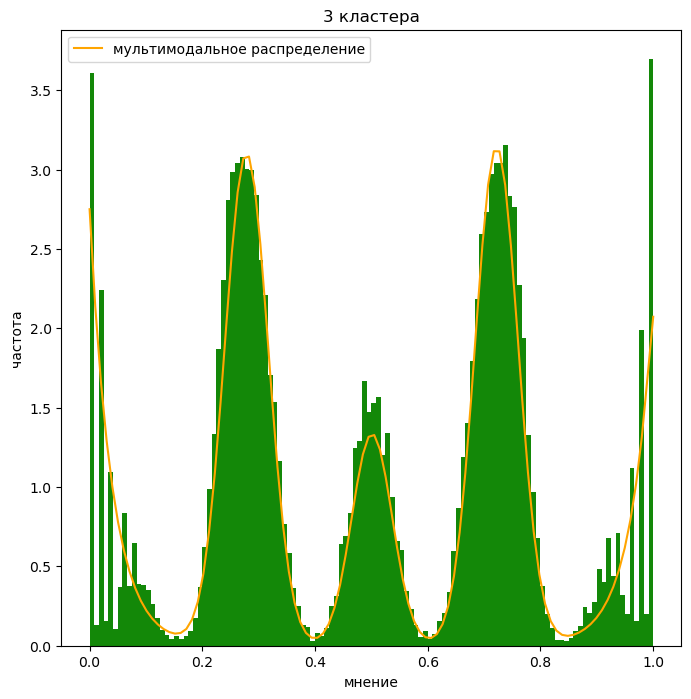

In [17]:
data = clv2.copy()
data=np.array(sorted(data))

fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(clv2), density = True, bins=120, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

one=data[:int(data.shape[0]*(1/10))]
two=data[int(data.shape[0]*(1/10)):int(data.shape[0]*(4.28/10))]
three=data[int(data.shape[0]*(4.28/10)):int(data.shape[0]*(5.73/10))]
four=data[int(data.shape[0]*(5.73/10)):int(data.shape[0]*(9/10))]
five=data[int(data.shape[0]*(9/10)):]

mu1 = np.mean(two)
sigma1 = np.std(two) 
mu2 = np.mean(three)
sigma2 = np.std(three) 
mu3 = np.mean(four)
sigma3 = np.std(four) 
print(f'среднекв отклонение {sigma1, sigma2, sigma3}, дисперсия {sigma1**2, sigma2**2, sigma3**2}, мат ожидание {mu1, mu2,mu3}')

pdf = stats.norm.pdf
rvs = stats.norm.rvs
trimodal_pdf = pdf(x, loc=mu1, scale=sigma1) * (float(0.3)) + \
              pdf(x, loc=mu2, scale=sigma2) * (float(0.12)) + \
              pdf(x, loc=mu3, scale=sigma3) * (float(0.3))+ \
              stats.expon.pdf(x,0, 0.04) * (float(0.11))+ \
            stats.laplace.pdf(x,0.999, 0.04) * (float(0.17))


plt.plot(x, trimodal_pdf, color ="orange", label='мультимодальное распределение')#+'\n'+fr'$\mu_1={mu1:.1f}$ $\sigma_1={sigma1:.3f}$'+'\n'+fr'$\mu_2={mu2:.1f}$ $\sigma_2={sigma2:.3f}$'+'\n'+fr'$\mu_3={mu3:.1f}$ $\sigma_3={sigma3:.3f}$')
plt.xlabel('мнение')
plt.ylabel('частота')
plt.title('3 кластера')
plt.legend()
plt.show()

In [33]:
c3 = sorted(clv2)
c3_1 = c3[:2900]
c3_2 = c3[2900:12870]
c3_3 = c3[12870:17160]
c3_4 = c3[17160:27120]
c3_5 = c3[27120:]

In [34]:
c_3= np.append(c3_1,c3_2)
#c_3 = np.append(c_3, c3_5)

In [35]:
c3

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


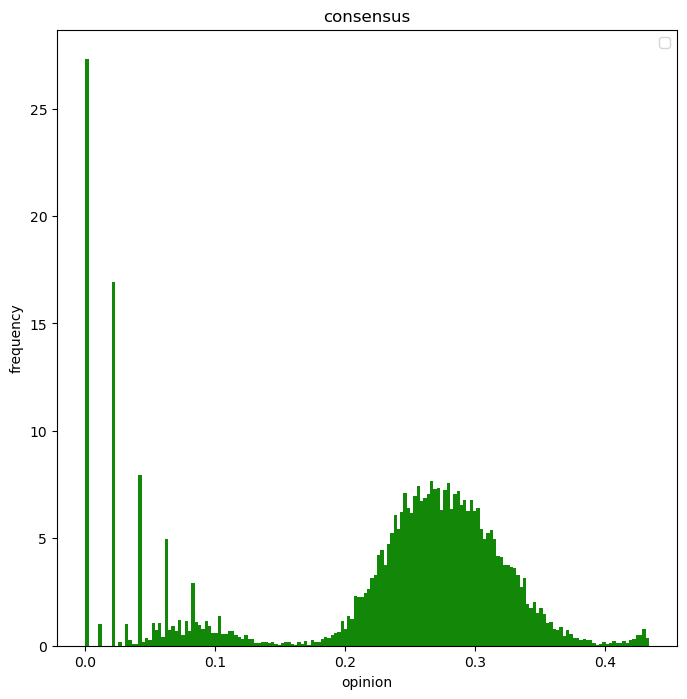

In [36]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(c_3), density = True, bins=170, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)


plt.xlabel('opinion')
plt.ylabel('frequency')
plt.title('consensus')
plt.legend()

plt.show()


In [30]:
np.std(c3_1), np.mean(c3_1)

(0.03598415858316076, 0.03468399850425226)

In [31]:
np.std(c3_2), np.mean(c3_2)

(0.041545310411503146, 0.2759367044536855)

In [32]:
np.std(c3_3), np.mean(c3_3)

(0.03879189403296068, 0.501321101155417)

In [33]:
np.std(c3_4), np.mean(c3_4)

(0.04179270962592878, 0.7259041940457444)

In [34]:
np.std(c3_5), np.mean(c3_5)

(0.035090490351375334, 0.9648884006862672)

In [35]:
np.where(c3==0.12396793318145442)

(array([], dtype=int64),)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


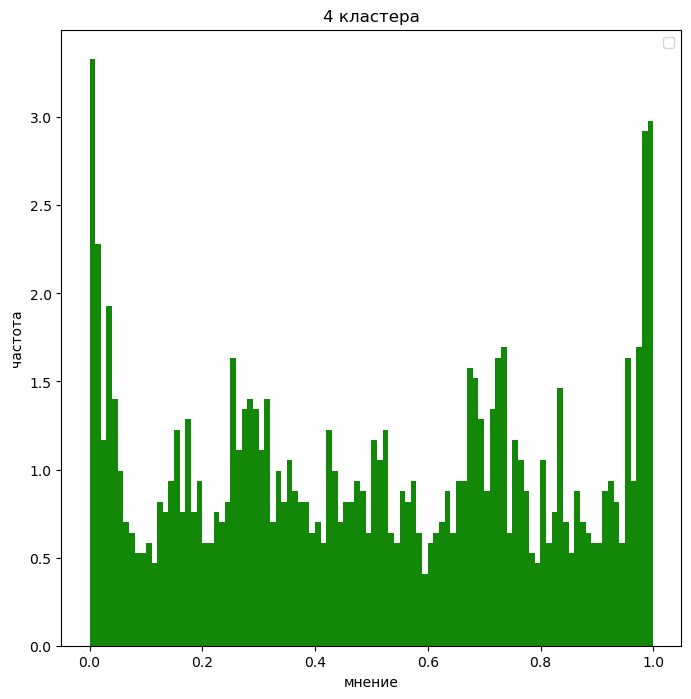

In [28]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(clv3), density = True, bins=100, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

pdf = stats.norm.pdf
rvs = stats.norm.rvs
trimodal_pdf = pdf(x, loc=0.279, scale=0.034) * (float(0.23)) + \
              pdf(x, loc=0.504, scale=0.036) * (float(0.18)) + \
              pdf(x, loc=0.724, scale=0.033) * (float(0.25))+ \
              stats.expon.pdf(x,0, 0.035) * (float(0.1))+ \
              stats.laplace.pdf(x,0.999, 0.035) * (float(0.24))


#plt.plot(x, trimodal_pdf, color ="orange", label='мультимодальное распределение')
plt.xlabel('мнение')
plt.ylabel('частота')
plt.title('4 кластера')
plt.legend()
plt.show()

In [37]:
c4 = sorted(clv3)
c4_1 = c4[:210]
c4_2 = c4[210:526]
c4_3 = c4[526:750]
c4_4 = c4[750:1065]
c4_5 = c4[1065:]
